In [1]:
# importing all necessary modules
import pandas as pd
import numpy as np
import tokenization
from wordcloud import STOPWORDS
import string
# Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Loading data into pandas dataframe.
file_location = '../../data/complaints.csv.zip'

full_df = pd.read_csv(file_location)

In [3]:
# First few lines of dataframe
full_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
3,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555
4,2020-10-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,334XX,NaN,Other,Web,2020-10-23,Closed with explanation,Yes,NaN,3915909


In [4]:
# Shape of the data
full_df.shape

(1839405, 18)

In [5]:
# Display All columns
full_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
# Display information about the columns
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839405 entries, 0 to 1839404
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 252.

In [7]:
full_df['Tags'].value_counts()

Servicemember                    126278
Older American                    94847
Older American, Servicemember     19988
Name: Tags, dtype: int64

In [8]:
full_df['Timely response?'].value_counts()

Yes    1800501
No       38904
Name: Timely response?, dtype: int64

In [9]:
# Select only necessary columns for further processing.
necessary_columns = ['Product', 'Sub-product', 'Issue',
                     'Sub-issue', 'Consumer complaint narrative', 'Submitted via']

In [10]:
# create new dataframe with necessary columns
df = full_df[necessary_columns]

In [11]:
# Changing column Name
df.columns = ['label', 'sub_label','issue',
              'sub_issue', 'full_text', 'submitted_via']

In [12]:
df.head()

,label,sub_label,issue,sub_issue,full_text,submitted_via
0,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,Web
1,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Web
2,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",Web
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,Web
4,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Web


In [13]:
# Checking Null values in the frame
df.isnull().sum()

label                  0
sub_label         235165
issue                  0
sub_issue         589910
full_text        1214191
submitted_via          0
dtype: int64

In [14]:
# Checking How many values in label column
df['label'].value_counts().to_frame()

,label
"Credit reporting, credit repair services, or other personal consumer reports",553660
Debt collection,321220
Mortgage,314233
Credit reporting,140432
Credit card or prepaid card,94142
Credit card,89190
Bank account or service,86206
Checking or savings account,76192
Student loan,59729
Consumer Loan,31604


In [15]:
# Set pandas option to show all column since notebook
# Restriction on showing all columns
pd.set_option('display.max_rows', None)
# disable chained assignments
pd.options.mode.chained_assignment = None 

In [16]:
# Checking How many values in sub-label column
df['sub_label'].value_counts().to_frame()

,sub_label
Credit reporting,546054
Checking account,117190
Other mortgage,86635
General-purpose credit card or charge card,71028
Conventional fixed mortgage,70613
I do not know,67782
Conventional home mortgage,51861
Other debt,50883
"Other (i.e. phone, health club, etc.)",44543
Credit card debt,38730


In [17]:
# check values in submitted column
df['submitted_via'].value_counts().to_frame()

,submitted_via
Web,1429188
Referral,202707
Phone,105169
Postal mail,78639
Fax,23279
Email,423


In [18]:
# Combine both issue and sub-issue to generate new column
df['combined_issue'] = df["issue"] + '-' + df["sub_issue"]

In [19]:
df['combined_issue'][1]

'Incorrect information on your report-Information belongs to someone else'

In [20]:
df.drop(columns=['issue', 'sub_issue'], inplace=True)

In [21]:
df.columns

Index(['label', 'sub_label', 'full_text', 'submitted_via', 'combined_issue'], dtype='object')

In [22]:
df['combined_issue'].value_counts().to_frame()[:20]

,combined_issue
Incorrect information on your report-Information belongs to someone else,217689
Problem with a credit reporting company's investigation into an existing problem-Their investigation did not fix an error on your report,80916
Incorrect information on your report-Account status incorrect,49195
Incorrect information on your report-Account information incorrect,45136
Attempts to collect debt not owed-Debt is not yours,41840
Incorrect information on credit report-Account status,37057
Cont'd attempts collect debt not owed-Debt is not mine,36727
Improper use of your report-Credit inquiries on your report that you don't recognize,35775
Incorrect information on credit report-Information is not mine,32384
Written notification about debt-Didn't receive enough information to verify debt,29016


In [23]:
# Rearrange columns
df=df.reindex(columns= ['full_text', 'combined_issue', 'submitted_via','sub_label', 'label'])

In [24]:
# Checking Null values in the frame
df.isnull().sum()

full_text         1214191
combined_issue     589910
submitted_via           0
sub_label          235165
label                   0
dtype: int64

In [25]:
# Null values precentage
df.isna().mean().round(4) * 100

full_text         66.01
combined_issue    32.07
submitted_via      0.00
sub_label         12.78
label              0.00
dtype: float64

<AxesSubplot:xlabel='count', ylabel='label'>

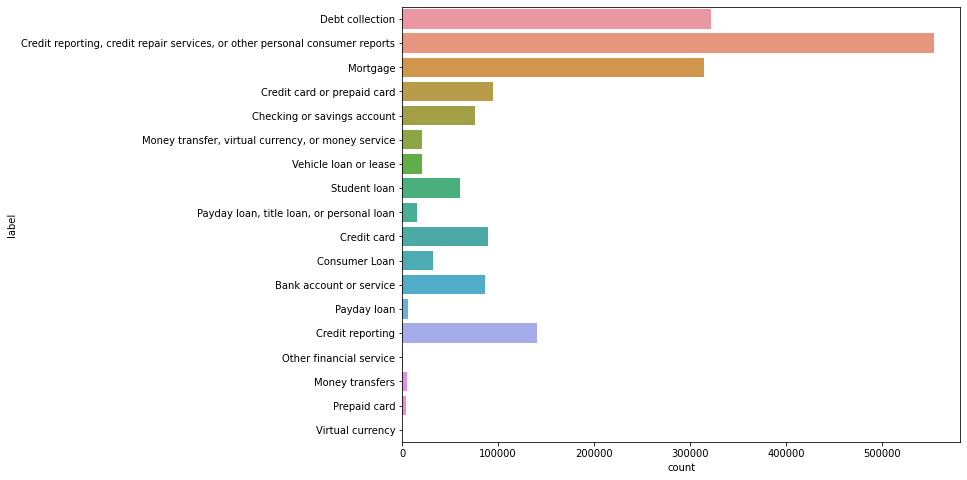

In [26]:
# Plot label
plt.figure(figsize=(10,8))
sns.countplot(y='label', data=df)

<AxesSubplot:xlabel='count', ylabel='sub_label'>

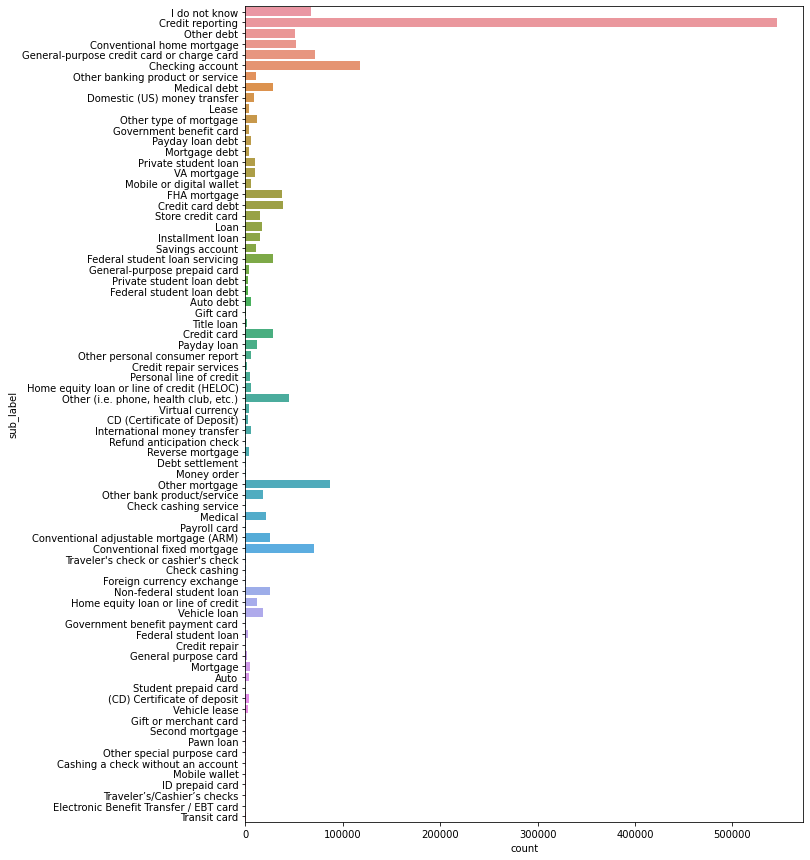

In [27]:
# Plot sublabel
plt.figure(figsize=(10,15))
sns.countplot(y='sub_label', data=df)

<AxesSubplot:>

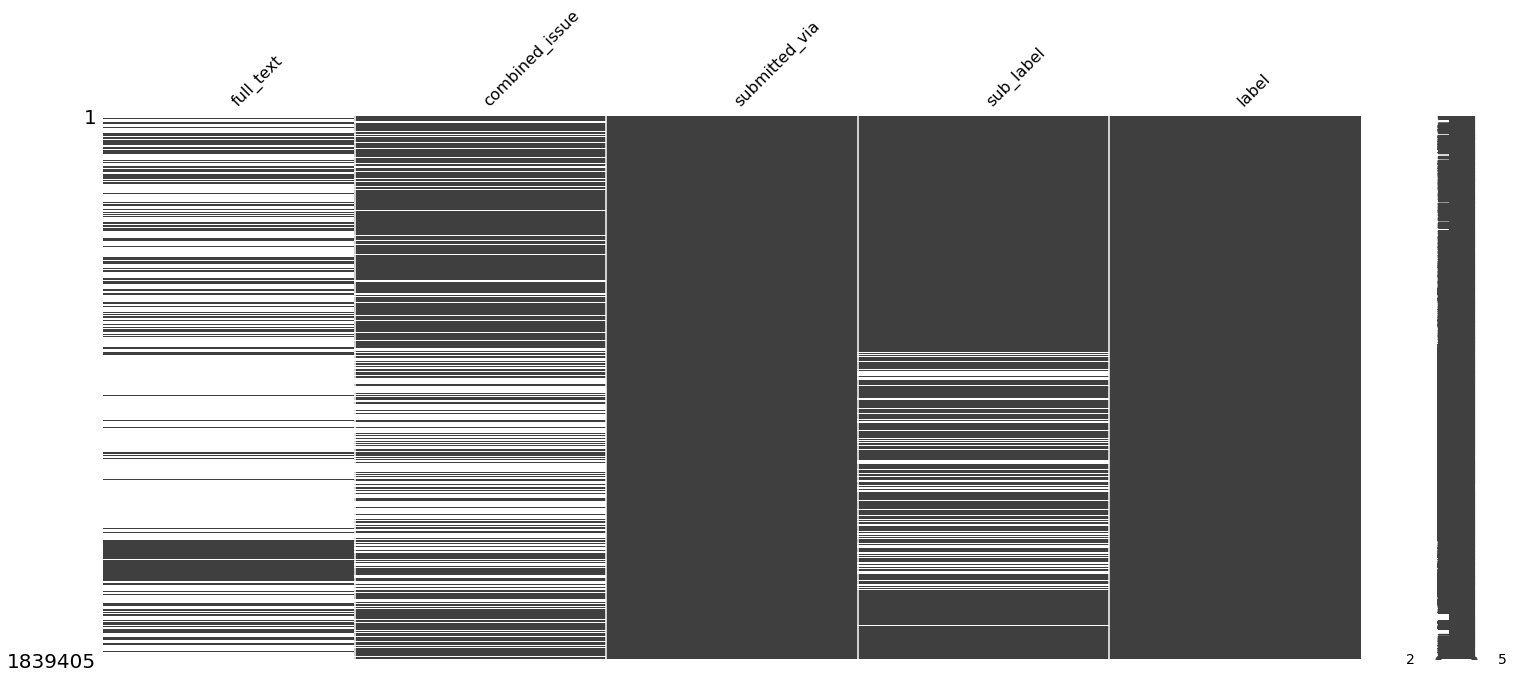

In [27]:
# Visualize missing values as a matrix 
msno.matrix(df)

<AxesSubplot:>

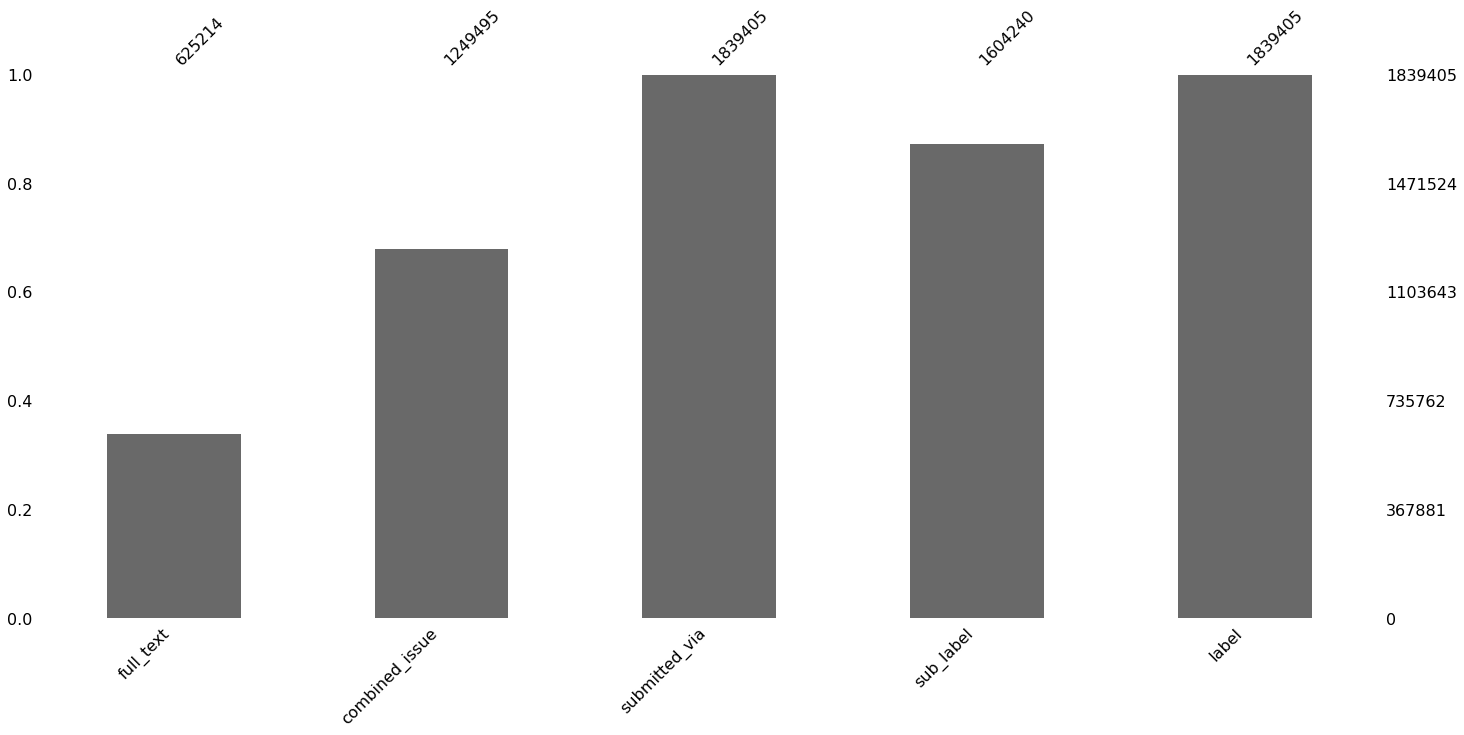

In [28]:
# Visualize the number of missing values as a bar chart 
msno.bar(df)

In [29]:
# Replacing missing value with combined issue column value
df['full_text'].fillna(df['combined_issue'], inplace=True)

<AxesSubplot:>

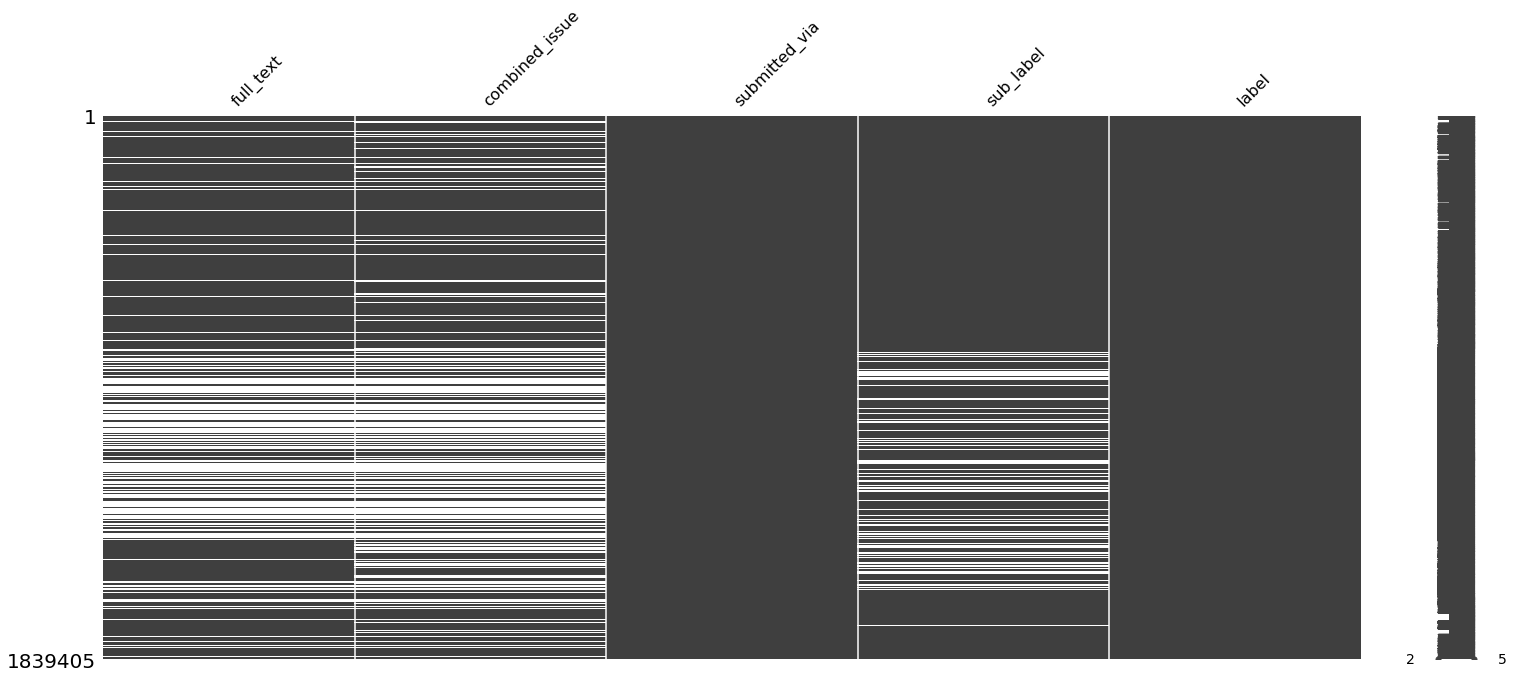

In [30]:
# Visualize missing values as a matrix 
msno.matrix(df)

<AxesSubplot:>

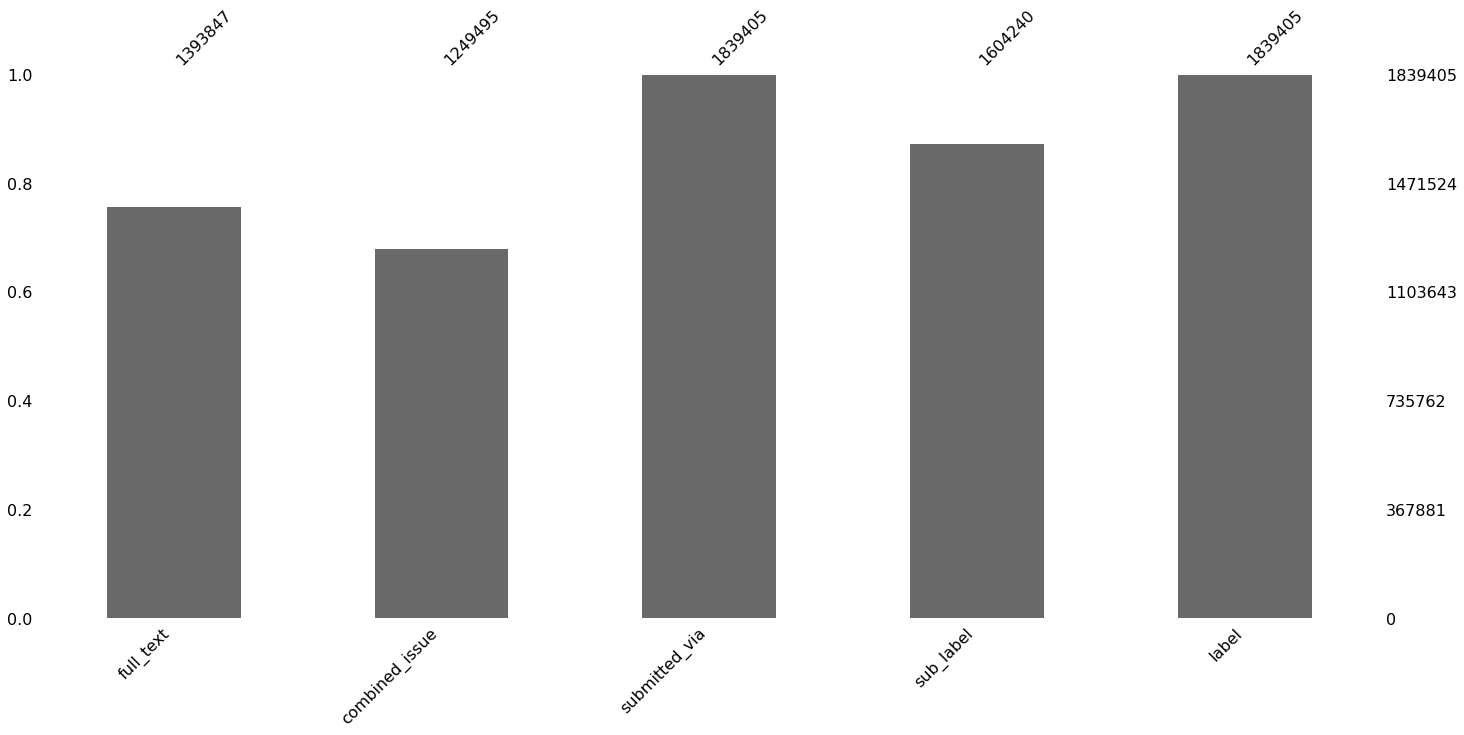

In [31]:
# Visualize the number of missing values as a bar chart 
msno.bar(df)

In [32]:
# Checking Null values in the frame
df.isnull().sum()

full_text         445558
combined_issue    589910
submitted_via          0
sub_label         235165
label                  0
dtype: int64

In [33]:
# shape of the dataframe
df.shape

(1839405, 5)

In [34]:
# Creating new dataframe contains only not null values
df_cleaned = df[df['full_text'].notna()]

In [35]:
# Cleaaned Dataframe shape
df_cleaned.shape

(1393847, 5)

In [36]:
# Checking Null values in the frame
df_cleaned.isnull().sum()

full_text              0
combined_issue    144352
submitted_via          0
sub_label         161016
label                  0
dtype: int64

In [37]:
# Dropping the combined issue column since we already have full text column
df_cleaned.drop(columns=['combined_issue'],inplace=True)

In [38]:
# Since combined issue having more duplicate value, we are removing those rows.
df_cleaned.drop_duplicates(inplace=True)

In [39]:
# Shape of the dataframe after removed duplicates
df_cleaned.shape

(579977, 4)

In [40]:
# List of column in the cleaned dataframe
df_cleaned.columns

Index(['full_text', 'submitted_via', 'sub_label', 'label'], dtype='object')

In [41]:
# Information about cleaned dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579977 entries, 0 to 1839404
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   full_text      579977 non-null  object
 1   submitted_via  579977 non-null  object
 2   sub_label      529544 non-null  object
 3   label          579977 non-null  object
dtypes: object(4)
memory usage: 22.1+ MB


In [44]:
df_cleaned.drop(columns=['submitted_via', 'sub_label'],inplace=True)

In [45]:
df_cleaned.columns

Index(['full_text', 'label'], dtype='object')

In [46]:
df_cleaned.to_csv("../../data/cleaned_data.csv")

# Meta features

In [43]:
# Word count - Number of words in the text
df_cleaned['word_count'] = df_cleaned['full_text'].apply(lambda x: len(str(x).split()))

In [44]:
# Unique word count - Number of unique words in the text
df_cleaned['unique_word_count'] = df_cleaned['full_text'].apply(lambda x: len(set(str(x).split())))

In [45]:
# Stop word count - Number of stop words in the text
df_cleaned['stop_word_count'] = df_cleaned['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [46]:
# url_count - Number of url in the text
df_cleaned['url_count'] = df_cleaned['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

In [47]:
# mean word length - Avarage character length
df_cleaned['mean_word_length'] = df_cleaned['full_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [48]:
# Char count - Number of character in the text
df_cleaned['char_count'] = df_cleaned['full_text'].apply(lambda x: len(str(x)))

In [49]:
# Punctuation count - Number of characters in text
df_cleaned['punctuation_count'] = df_cleaned['full_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [50]:
df_cleaned.head()

,full_text,submitted_via,sub_label,label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count
0,transworld systems inc. \nis trying to collect...,Web,I do not know,Debt collection,18,15,9,0,4.444444,98,3
1,Incorrect information on your report-Informati...,Web,Credit reporting,"Credit reporting, credit repair services, or o...",9,9,4,0,7.111111,72,1
2,"Over the past 2 weeks, I have been receiving e...",Web,I do not know,Debt collection,78,54,43,0,4.076923,395,5
3,Pioneer has committed several federal violatio...,Web,Other debt,Debt collection,152,96,41,0,4.611842,852,40
5,Problem with a credit reporting company's inve...,Web,Credit reporting,"Credit reporting, credit repair services, or o...",20,18,9,0,5.850000,136,2


### Handle Imbalanced data

<AxesSubplot:xlabel='count', ylabel='label'>

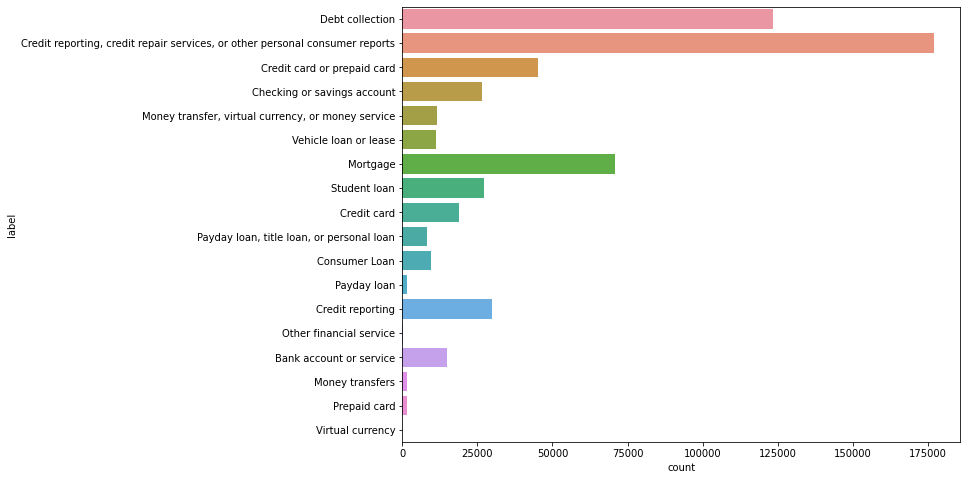

In [51]:
# Plot label
plt.figure(figsize=(10,8))
sns.countplot(y='label', data=df_cleaned)

In [52]:
!pip install googletrans

You should consider upgrading via the 'e:\springboard\works\support_ticket_label_classification\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [53]:
virtual_currecy_data = df_cleaned.loc[df_cleaned['label'] == 'Virtual currency']

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [86]:
virtual_currecy_data[:1]

,full_text,submitted_via,sub_label,label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count
610371,"Two weeks ago my accounts with Coinbase were locked for some unknown reason. Since then I have attempted to reset my password to access my account and have been unable to do so because Coinbase does not recognize my IP address and after contacting their customer support I have received no response except for an initial email telling me to reset my password, which I can not do as stated above. Coinbase now has blocked my accounts and stopped communicating with me. They are holding approximately $ 16K of my money in Bitcoins.",Web,Domestic (US) money transfer,Virtual currency,93,70,49,0,4.698925,529,6


In [65]:
virtual_currecy_data.shape

(14, 11)

In [66]:
from googletrans import Translator
translator = Translator()

In [88]:
def german_translation(x):
    german_translation = translator.translate(x, dest='de')    
    return german_translation.text

def italian_translation(x):   
    german_translation = translator.translate(x, dest='it')    
    return german_translation.text

def arabic_translation(x):
    german_translation = translator.translate(x, dest='ar')    
    return german_translation.text
    

def English_translation(x):  
    english_translation = translator.translate(x, dest='en')    
    return english_translation.text

In [89]:
x = german_translation('''Two weeks ago my accounts with Coinbase were locked for some unknown reason. 
Since then I have attempted to reset my password to access my account and have been
unable to do so because Coinbase does not recognize my IP address and after contacting
their customer support I have received no response except for an initial email telling
me to reset my password, which I can not do as stated above. Coinbase now has blocked my accounts
and stopped communicating with me. They are holding approximately $ 16K of my money in Bitcoins.''')
print(English_translation(x))

Two weeks ago my accounts with Coinbase were suspended for an unknown reason.
Since then, I've tried to reset my password to access my account
This is not possible because Coinbase does not recognize my IP address and after contacting me
I haven't received a reply, except for a first email
I need to reset my password which I cannot do as stated above. Coinbase has now blocked my accounts
and stopped communicating with me. They hold about $ 16K of my money in bitcoins.


In [90]:
x = italian_translation('''Two weeks ago my accounts with Coinbase were locked for some unknown reason. 
Since then I have attempted to reset my password to access my account and have been
unable to do so because Coinbase does not recognize my IP address and after contacting
their customer support I have received no response except for an initial email telling
me to reset my password, which I can not do as stated above. Coinbase now has blocked my accounts
and stopped communicating with me. They are holding approximately $ 16K of my money in Bitcoins.''')
print(English_translation(x))

Two weeks ago my accounts with Coinbase were blocked for some unknown reason.
I have since attempted to reset my password to access my account and have done so
unable to do this because Coinbase does not recognize my IP address and after contacting
their customer support received no response except for an initial email message
me to reset my password, which I cannot do as indicated above. Coinbase has now blocked my accounts
and stopped communicating with me. They are holding about $ 16K of my money in Bitcoin.


In [91]:
x = arabic_translation('''Two weeks ago my accounts with Coinbase were locked for some unknown reason. 
Since then I have attempted to reset my password to access my account and have been
unable to do so because Coinbase does not recognize my IP address and after contacting
their customer support I have received no response except for an initial email telling
me to reset my password, which I can not do as stated above. Coinbase now has blocked my accounts
and stopped communicating with me. They are holding approximately $ 16K of my money in Bitcoins.''')
print(English_translation(x))

Two weeks ago, my Coinbase accounts were closed for an unknown reason.
Since then I tried to reset the password to access my account and it did
Unable to do this because Coinbase does not recognize my IP address and is connected
Customer Support I have not received any response except for an initial email
For me to reset my password, which I cannot do as mentioned above. Coinbase has now blocked my accounts
And stop communicating with me. They hold around $ 16K of my Bitcoin funds.


In [55]:
df_cleaned.to_csv("../../data/support_ticket.csv")

In [47]:
df_clean = pd.read_csv("../../data/cleaned_data.csv")

In [48]:
df_clean.shape

(579977, 3)

In [49]:
df_val = df_clean.sample(frac=0.3)

In [50]:
df_val.shape

(173993, 3)

In [51]:
df_clean.drop(df_val.index, inplace=True)

In [52]:
df_clean.shape

(405984, 3)

In [53]:
df_clean.reset_index(inplace=True)

In [54]:
df_val.reset_index(inplace=True)

In [55]:
df_clean.to_csv("../../data/training.csv")

In [56]:
df_val.to_csv("../../data/test.csv")